In [13]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.cm as cm
from scipy.stats import spearmanr
from scipy.stats import kstest

plt.style.use(astropy_mpl_style)

In [14]:
path = os.path.expanduser('~/notebook/Forrest/')
#Full Sample of 682 with all filters- Parameters
HW=Table.read(os.path.expanduser(path+'FORREST-PARAMETERS.csv')) 
HW=HW.to_pandas()
#EELGs from full sample
path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
EELGs=pd.merge(left=stuff['id'], right=HW, left_on='id', right_on='Galaxy_ID')
EELGs=EELGs.drop(['col0','id'],axis=1)
##########################################MAGPHYS DATA###########################################################
#######Full Sample#######
F = Table.read(os.path.expanduser(path+'FINAL-PARAMETERS.csv'), format='ascii')
F=F.to_pandas()
#EELGs
FELG = pd.merge(left=F,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
#Errorbars
Fers=Table.read(os.path.expanduser(path+'FINAL_ERRORBARS.csv')) 
Fers=Fers.to_pandas()
#######Kband Removed Sample########
FM = Table.read(os.path.expanduser(path+'FINALM-PARAMETERS.csv'), format='ascii')
FM=FM.to_pandas()
#EELGs
FMELG = pd.merge(left=FM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
#Errorbars
FMers=Table.read(os.path.expanduser(path+'FINALM_ERRORBARS.csv')) 
FMers=FMers.to_pandas()
###########Tommy#################
T = Table.read(os.path.expanduser(path+'Tommy-Parameters.csv'), format='ascii')
T=T.to_pandas()
##########Unconstrained Sample############
Fun2 = Table.read(os.path.expanduser(path+'Unconstrained-FINAL.csv'), format='ascii')
Fun2=Fun2.to_pandas()
Fun=pd.merge(left=F,right=Fun2['Galaxy_ID'], left_on='Galaxy_ID',right_on='Galaxy_ID')
##########################################ProSpect DATA###########################################################
#######Full Sample#######
S = Table.read(os.path.expanduser('~/Documents/Sample_un.csv'), format='ascii')
S=S.to_pandas()
pd.set_option('display.max_columns', None)
S.sort_values(by=['id'],inplace=True)
S
#EELGs
SELG = pd.merge(left=S,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
#######Emission Removed#######
Sem = Table.read(os.path.expanduser('~/Documents/Sample_em_un.csv'), format='ascii')
Sem=Sem.to_pandas()
pd.set_option('display.max_columns', None)
Sem.sort_values(by=['id'],inplace=True)
#EELGs
SemELG = pd.merge(left=Sem,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
########################################Bluminosity#############################################################

BF = Table.read(os.path.expanduser(path+'Bluminosity-FINAL.csv'), format='ascii')
BF=BF.to_pandas()
BF=pd.concat([BF,F['Galaxy_ID']],axis=1)
BFELG = pd.merge(left=BF,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFM = Table.read(os.path.expanduser(path+'Bluminosity-FINALM.csv'), format='ascii')
BFM=BFM.to_pandas()
BFM=pd.concat([BFM,FM['Galaxy_ID']],axis=1)
BFMELG = pd.merge(left=BFM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFIGM = Table.read(os.path.expanduser(path+'Bluminosity-NOIGM.csv'), format='ascii')
BFIGM=BFIGM.to_pandas()
BFIGM=pd.concat([BFIGM,F['Galaxy_ID']],axis=1)
BFIGMELG = pd.merge(left=BFIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFMIGM = Table.read(os.path.expanduser(path+'Bluminosity-FMIGM.csv'), format='ascii')
BFMIGM=BFMIGM.to_pandas()
BFMIGM=pd.concat([BFMIGM,FM['Galaxy_ID']],axis=1)
BFMIGMELG = pd.merge(left=BFMIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

#########Parameters#########
IGM = Table.read(os.path.expanduser(path+'NOIGM-Parameters.csv'), format='ascii')
IGM=IGM.to_pandas()
FMIGM=Table.read(os.path.expanduser(path+'FMIGM-Parameters.csv'), format='ascii')
FMIGM=FMIGM.to_pandas()

##########################################CEERS DATA###########################################################
######Full Sample Physical Parameters#######
C = Table.read(os.path.expanduser(path+'C7-Parameters.csv'), format='ascii')
C = C.to_pandas()

MT = Table.read(os.path.expanduser(path+'MTAO1-Parameters.csv'), format='ascii')
MT = MT.to_pandas()
######Bluminosity slope######
BC = Table.read('~/notebook/Laptop/Bluminosity-CEERS4.csv', format='ascii')
BC = BC.to_pandas()
BMT= Table.read('~/notebook/Laptop/Bluminosity-MTAO1.csv', format='ascii')
BMT = BMT.to_pandas()
######Sion#######
BC4IGM = Table.read('~/notebook/Laptop/Bluminosity-C4IGM.csv', format='ascii')
BC4IGM = BC4IGM.to_pandas()
BMTIGM= Table.read('~/notebook/Laptop/Bluminosity-TAOIGM.csv', format='ascii')
BMTIGM = BMTIGM.to_pandas()
##########################################JADES DATA###########################################################
JSN = Table.read('~/notebook/Laptop/JSN-beta.csv', format='ascii')
JSN = JSN.to_pandas()
JS = Table.read(os.path.expanduser(path+'JSN-Parameters.csv'),format='ascii')
JS = JS.to_pandas()
# Parameters=[r'SFH $f_{mu}$',r'IR $f_{mu}$',r'$\mu$',r'$\tau_V$',r'sSFR$_{0.1Gyr}$','M(stars)','Ldust',
#r'$T_C^{ISM}$',r'$T_W^{BC}$',r'$\chi_C^{tot}$',r'$\chi_{PAH}^{tot}$',r'$\chi_{MIR}^{tot}$',r'$\chi_{W}^{tot}$',
#r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$',r'$A_V$',r'$age_M$','Tdust','lg(M/Lh)','lg(M/Lk)']

In [15]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

In [ ]:
mpl.rcParams.update({'font.size': 22})
#correlation of sion with beta from photometry 

#r'$SFR_{0.1Gyr}$'#
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(F[r'$SFR_{0.1Gyr}$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$SFR_{0.1Gyr}$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log SFR/ M$_{\odot}$/yr')
ax[0].set_ylabel('Bluminosity (beta)')
ax[0].set_xlim(1,10**3)
ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F[r'$SFR_{0.1Gyr}$']),BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)

corr_coef, p_value = spearmanr(log10(FM[r'$SFR_{0.1Gyr}$']),BFMIGM['betaP'])
ax[1].errorbar(FM[r'$SFR_{0.1Gyr}$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$SFR_{0.1Gyr}$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log SFR krem/ M$_{\odot}$/yr')
ax[1].set_xscale('log')
ax[1].set_xlim(1,10**3)
ax[1].set_ylim(-4,3)

#r'sSFR$_{0.1Gyr}$'#

fig,ax=plt.subplots(1,2,figsize=(16,10))
ax[0].errorbar(F[r'sSFR$_{0.1Gyr}$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'sSFR$_{0.1Gyr}$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log sSFR/ /yr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'sSFR$_{0.1Gyr}$'],BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)

ax[1].errorbar(FM[r'sSFR$_{0.1Gyr}$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'sSFR$_{0.1Gyr}$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log sSFR krem/ /yr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'sSFR$_{0.1Gyr}$'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)





# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F['Ldust'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG['Ldust'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log Dust Luminosity /L$_\odot$')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F['Ldust']),BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

ax[1].errorbar(FM['Ldust'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG['Ldust'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log Dust Luminosity krem/L$_\odot$')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM['Ldust'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

#####################################################################
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$age_M$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$age_M$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
# ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'$age_M$ /Gyr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'$age_M$'],BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)


# corr_coef, p_value = spearmanr(log10(FM[r'$age_M$']),B['betaP'])
ax[1].errorbar(FM[r'$age_M$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$age_M$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'$age_M$ krem/Gyr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'$age_M$'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)
#########################################################################

fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$age_M$'],BFIGM['sion'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$age_M$'],BFIGMELG['sion'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
# ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'$age_M$ /Gyr')
ax[0].set_ylabel('sion')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'$age_M$'],BFIGM['sion'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)


# corr_coef, p_value = spearmanr(log10(FM[r'$age_M$']),B['betaP'])
ax[1].errorbar(FM[r'$age_M$'],BFMIGM['sion'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$age_M$'],BFMIGMELG['sion'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'$age_M$ krem/Gyr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'$age_M$'],BFMIGM['sion'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(FM[r'$age_M$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# # ax.set_xscale('log')
# plt.errorbar(FMELG[r'$age_M$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',markersize=10)#, marker='*',c='yellow' )#,s=105, alpha=0.5)

# plt.legend()
# plt.xlabel(r'age /Gyr$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F[r'$age_M$'],B['betaP'])#,weights=weights)
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(F['Ldust'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# ax.set_xscale('log')
# plt.legend()
# plt.xlabel(r'log Dust Luminosity /L$_\odot$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F['Ldust'],B['betaP'])
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
plt.errorbar(F['M(dust)'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Dust Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(dust)'],BFIGM['betaP'])
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**5,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**5,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
# def weighted_spearman(x,y,weights):
#     arr = np.asarray(x.values, dtype=np.float64)
#     weights = np.asarray(weights, dtype=np.float64)
#     x_weighted = np.repeat(arr, weights)
#     y_weighted = np.repeat(y.asarray(y, dtype=np.float64), weights)
#     corr_coef, p_value = spearmanr(x_weighted,y_weighted, nan_policy='propagate')#,weights=weights)
#     return corr_coef, p_value
# weights = np.zeros_like(B['betaP'])
# for i in range(len(B['betaP'])):
#     weights[i] = 1/(B['betaP_er'][i]*(Fers['SMh'][i]+Fers['SMl'][i])/2)
# corr_coef, p_value=weighted_spearman(F['M(stars)'],B['betaP'], weights)
plt.errorbar(F['M(stars)'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Stellar Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(stars)'],BFIGM['betaP'])#,weights=weights)
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)
# fig,ax=plt.subplots(figsize=(16,10))
#r'$age_M$'


In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax=plt.subplots(figsize=(16,10))

plt.errorbar(BF['betaU'],BF['betaP'],xerr=BF['betaU_er'],yerr=BF['betaP_er'],fmt='o')
plt.xlabel('Unattenuated Bluminosity')
plt.ylabel('Photometric Bluminosity')

fig,ax=plt.subplots(figsize=(16,10))
plt.title('krem')
plt.errorbar(BFM['betaU'],BFM['betaP'],xerr=BFM['betaU_er'],yerr=BFM['betaP_er'],fmt='o')#,color='red', ecolor='blue')
plt.xlabel('Unattenuated Bluminosity')
plt.ylabel('Photometric Bluminosity')

In [5]:
ss=pd.read_csv(os.path.expanduser('~/notebook/Forrest/specsions.csv'))
ss

ms=pd.merge(FMELG,ss,left_on='Galaxy_ID',right_on='zfourge_id')
ms

# ar = []
# ar.append([ms.iloc[2],ms.iloc[7],ms.iloc[11],ms.iloc[15]])
# ar
crap = pd.read_csv(os.path.expanduser('~/Downloads/kmos_fast_o3_ew.csv'))
crap
ms2=pd.merge(FMELG,crap,left_on='Galaxy_ID',right_on='IDs')
ms2
ms3=pd.merge(ms2,ss,left_on='Galaxy_ID',right_on='zfourge_id')
# ms3

In [5]:
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[r'sSFR$_{0.1Gyr}$'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[r'sSFR$_{0.1Gyr}$'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[r'sSFR$_{0.1Gyr}$'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],75)
x_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# y_error = np.array([[median - lower_quartile], [upper_quartile - median]])
MEDIAN2= median(C[r'sSFR$_{0.1Gyr}$'])
LOWER2=np.percentile(C[r'sSFR$_{0.1Gyr}$'],25)
UPPER2=np.percentile(C[r'sSFR$_{0.1Gyr}$'],75)
y_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])

MEDIAN2= median(C['M(stars)'])
LOWER2=np.percentile(C['M(stars)'],25)
UPPER2=np.percentile(C['M(stars)'],75)
x_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])

MEDIAN3= median(FMELG[r'sSFR$_{0.1Gyr}$'])
LOWER3=np.percentile(FMELG[r'sSFR$_{0.1Gyr}$'],25)
UPPER3=np.percentile(FMELG[r'sSFR$_{0.1Gyr}$'],75)
y_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])

MEDIAN3= median(FMELG['M(stars)'])
LOWER3=np.percentile(FMELG['M(stars)'],25)
UPPER3=np.percentile(FMELG['M(stars)'],75)
x_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])

/tmp/ipykernel_3157876/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


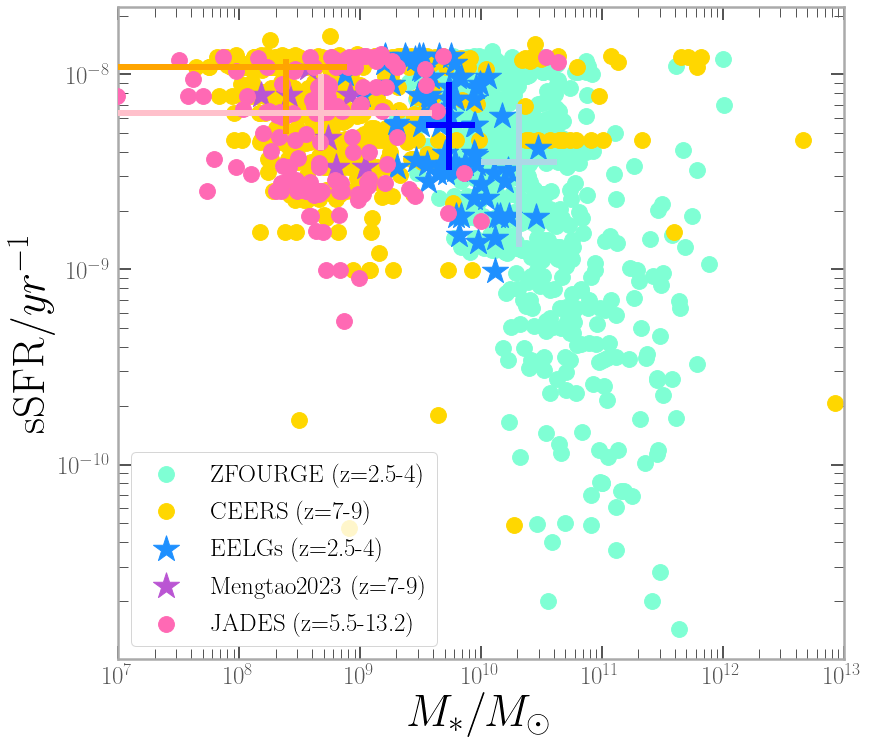

In [8]:
mpl.rcParams.update({'font.size': 22})
# plt.style.use('dark_background')
#B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP']
# fig,ax=plt.subplots(figsize=(16,10))
fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'sSFR/$yr^{-1}$')
# r'sSFR$_{0.1Gyr}$'
plt.scatter(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],
                          FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[r'sSFR$_{0.1Gyr}$']
                            ,label='ZFOURGE (z=2.5-4)',s=250,c='aquamarine')#,cmap=cm.Spectral)
plt.errorbar(20695000000.0,3.568e-09,xerr=x_error,yerr=y_error,c='aqua',ecolor='lightblue',linewidth=6,zorder=10)

plt.scatter(C['M(stars)'],C[r'sSFR$_{0.1Gyr}$'],label='CEERS (z=7-9)',s=250,c='gold')

plt.errorbar(median(C['M(stars)']),median(C[r'sSFR$_{0.1Gyr}$']),xerr=x_error2,yerr=y_error2,c='gold',ecolor='orange',linewidth=6,zorder=10)
plt.scatter(FMELG['M(stars)'],FMELG[r'sSFR$_{0.1Gyr}$'],label='EELGs (z=2.5-4)',s=750,c='dodgerblue',marker='*')

plt.errorbar(median(FMELG['M(stars)']),median(FMELG[r'sSFR$_{0.1Gyr}$']),xerr=x_error3,yerr=y_error3,c='dodgerblue',ecolor='blue',linewidth=6,zorder=10)

# plt.scatter(FMELG.where(FMELG['redshift']>3.3)['M(stars)'].dropna(),
#             FMELG.where(FMELG['redshift']>3.3)[r'sSFR$_{0.1Gyr}$'].dropna(),c='dodgerblue',marker='*',s=750)
plt.scatter(MT['M(stars)'],MT[r'sSFR$_{0.1Gyr}$'],label='Mengtao2023 (z=7-9)',s=750,c='mediumorchid',marker='*')
plt.scatter(JS['M(stars)'],JS[r'sSFR$_{0.1Gyr}$'],label='JADES (z=5.5-13.2)',s=250,c='hotpink',marker='o',zorder=3)
plt.errorbar(median(JS['M(stars)']),median(JS[r'sSFR$_{0.1Gyr}$']),xerr=x_error3,yerr=y_error3,c='hotpink',ecolor='pink',linewidth=6,zorder=10)

# plt.colorbar(sc,label='Bluminosity')
ax.set_xlim(10**7,10**13)
plt.legend()
ax.set_yscale('log')
ax.set_xscale('log')
fig.savefig('sSFRvsSM.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
# BFMIGMELG[BFMIGMELG['sion']==min(BFMIGMELG['sion'])]
FMELG.where(FMELG['Galaxy_ID']==23511).dropna()['M(stars)']

/home/magnus/notebook/Forrest/


/tmp/ipykernel_3661913/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


ValueError: x and y must be the same size

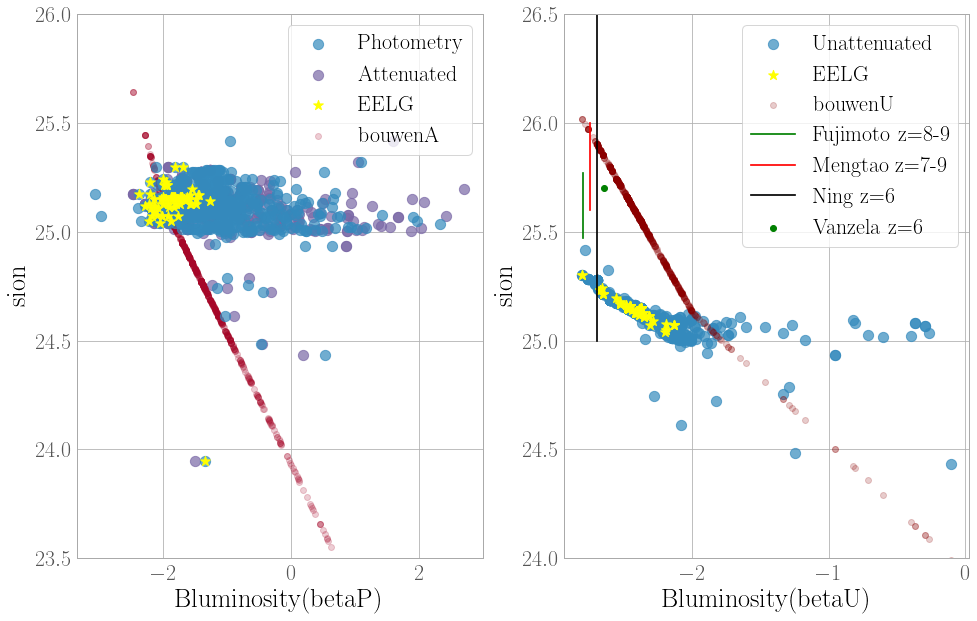

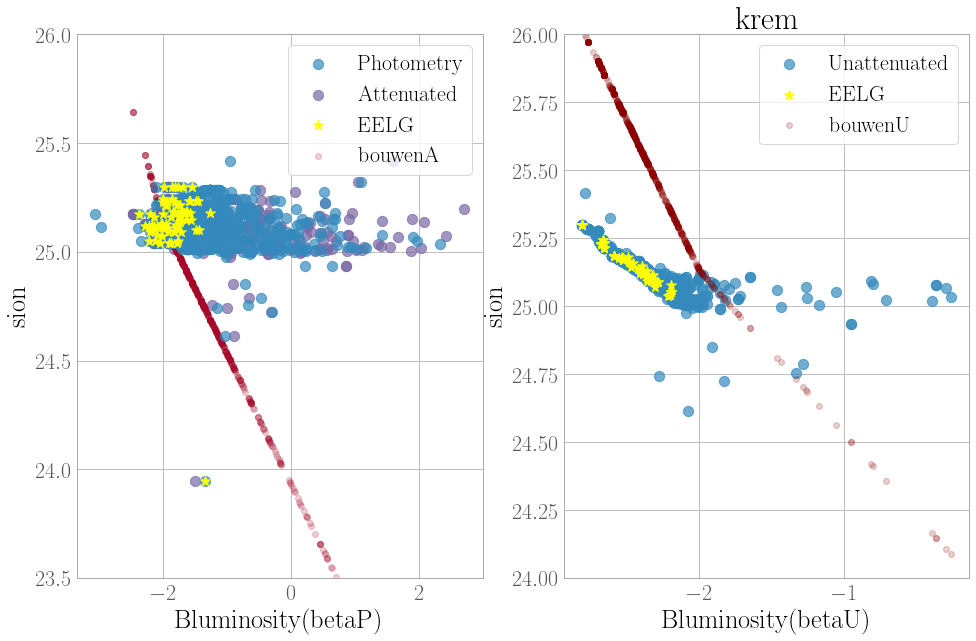

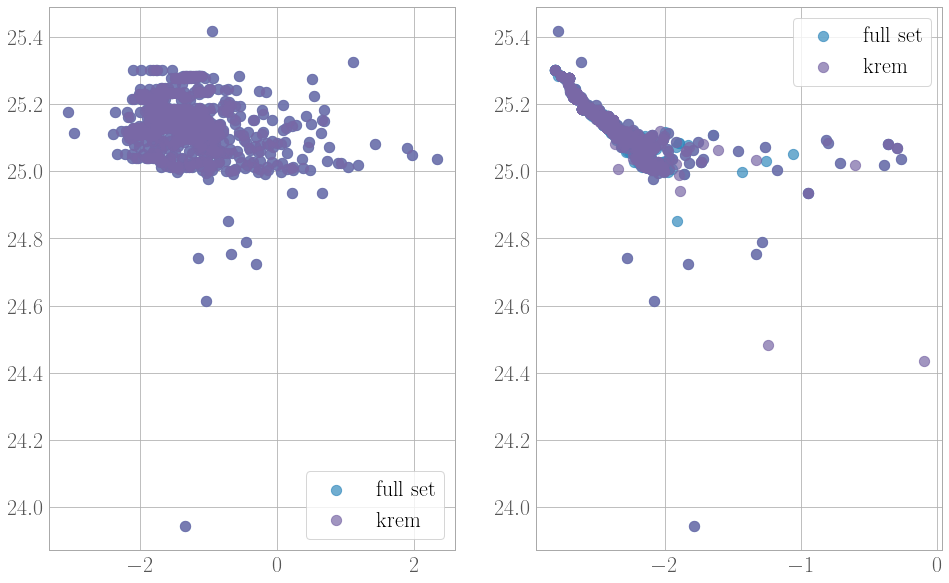

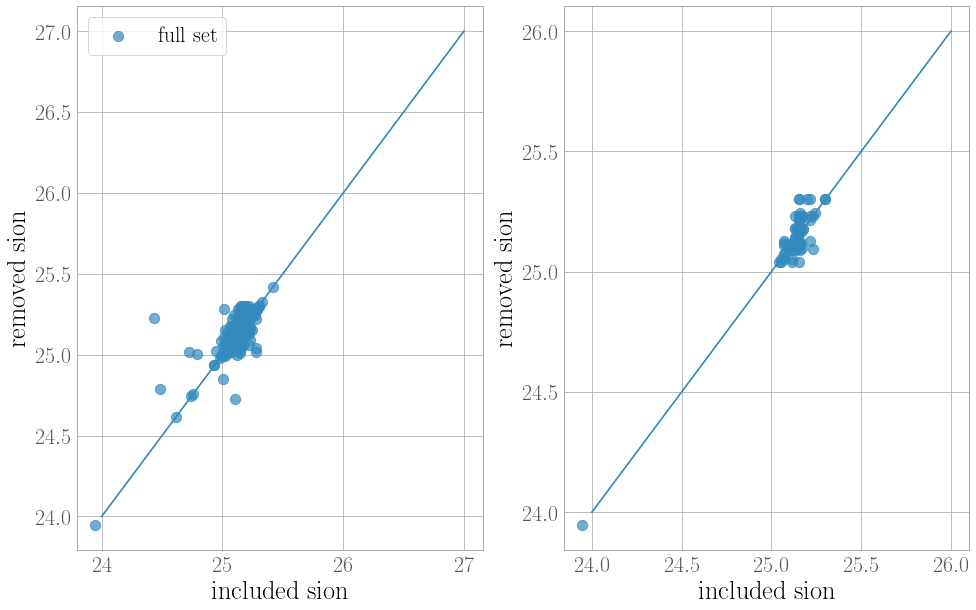

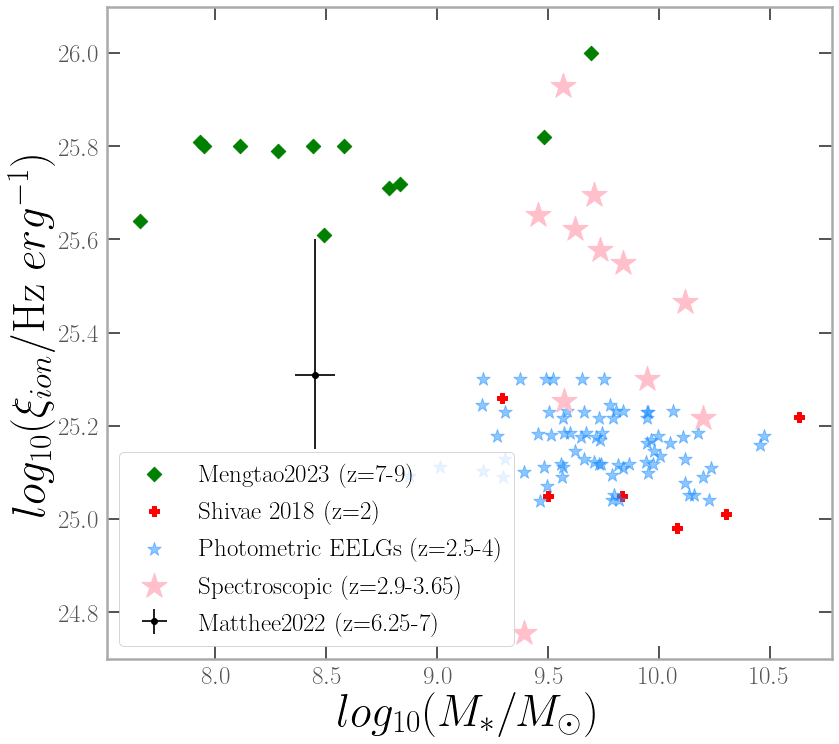

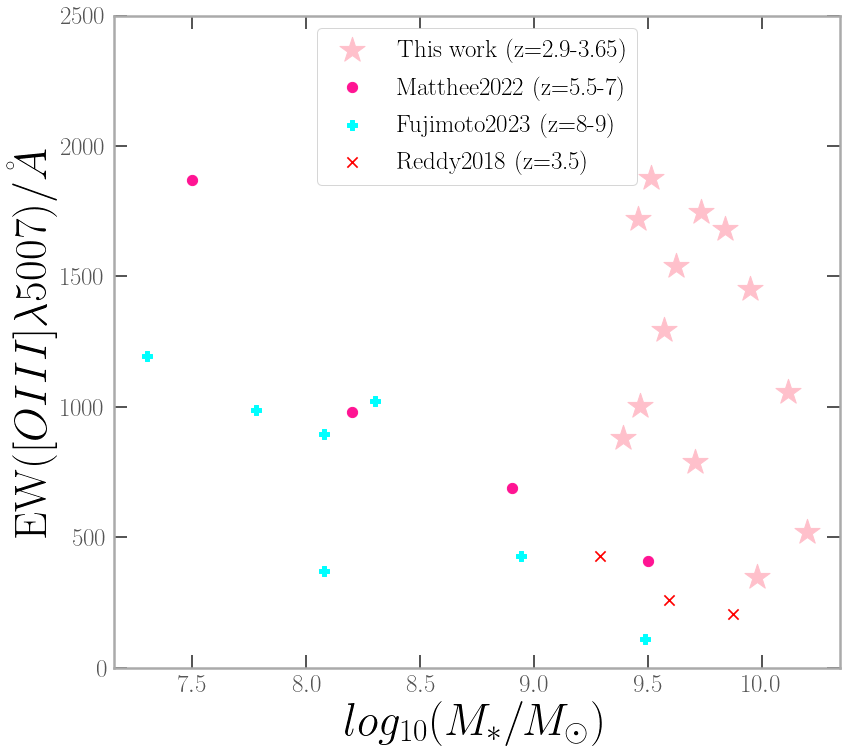

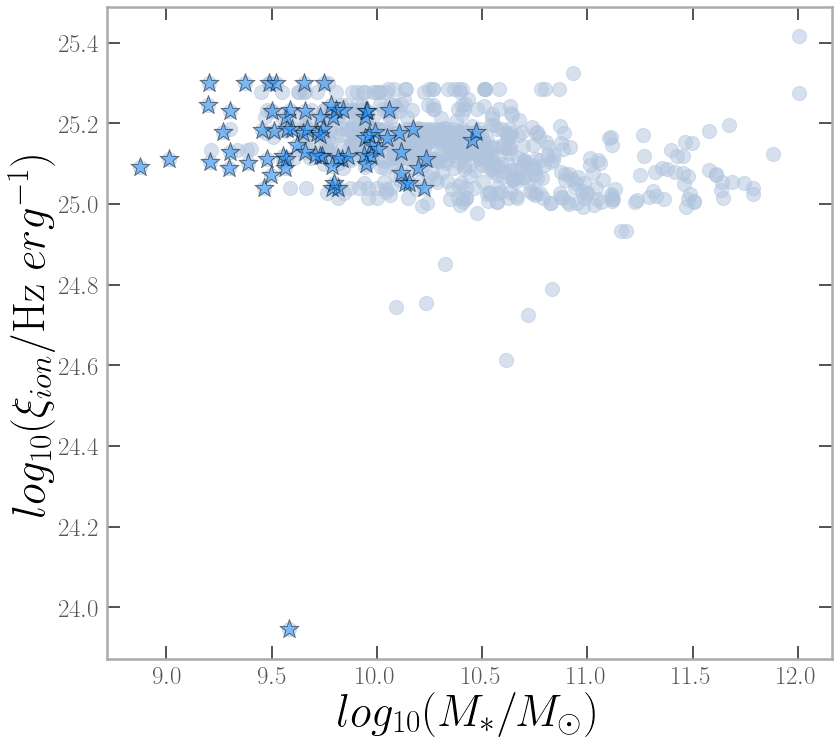

In [22]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(1,2,figsize=(16,10))

# sc=plt.scatter(B['betaP'],B['sion'],label='integrated sion',s=105,c=B['betaU'], alpha=0.7)
# plt.colorbar(sc,label='Unattenuated beta')
ax[0].scatter(BFIGM['betaP'],BFIGM['sion'],label='Photometry',s=105, alpha=0.7,zorder=2)
ax[0].scatter(BFIGM['beta'],BFIGM['sion'],label='Attenuated',s=105, alpha=0.7)
# plt.scatter(B['betaU'],B['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[0].scatter(BFIGMELG['betaP'],BFIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG',zorder=3)
# plt.scatter(B['betaU'],B['bouwen'],label='bouwen')
ax[0].scatter(BFIGM['beta'],BFIGM['bouwenA'],label='bouwenA',alpha=0.2)
# plt.scatter(B['beta'],B['sion'],label='integrated sion',s=105,c='pink')
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry')
ax[0].legend()
ax[0].set_xlabel('Bluminosity(betaP)')
ax[0].set_ylabel('sion')
ax[0].set_ylim(23.5,26)
# ax.set_xscale('log')
ax[1].scatter(BFIGM['betaU'],BFIGM['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[1].scatter(BFIGMELG['betaU'],BFIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG')
ax[1].scatter(BFIGM['betaU'],BFIGM['bouwen'],label='bouwenU',alpha=0.2,c='darkred')
# ax[1].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2,c='red')
ax[1].plot(linspace(-2.8,-2.8,10),linspace(25.47,25.77,10),c='g',label='Fujimoto z=8-9')
ax[1].plot(linspace(-2.75,-2.75,10),linspace(25.6,26,10),c='r',label='Mengtao z=7-9')
ax[1].plot(linspace(-2.7,-2.7,10),linspace(25,26.5,10),c='k',label='Ning z=6')
ax[1].scatter(-2.65,25.7,c='g',label='Vanzela z=6')

ax[1].legend()
ax[1].set_xlabel('Bluminosity(betaU)')
ax[1].set_ylabel('sion')
ax[1].set_ylim(24,26.5)

# ax.set_xlim(0,10**3)
# ax.set_ylim(-3,1)

fig,ax=plt.subplots(1,2,figsize=(16,10))
plt.title('krem')
# sc=plt.scatter(B['betaP'],B['sion'],label='integrated sion',s=105,c=B['betaU'], alpha=0.7)
# plt.colorbar(sc,label='Unattenuated beta')
ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='Photometry',s=105, alpha=0.7,zorder=2)
ax[0].scatter(BFMIGM['beta'],BFMIGM['sion'],label='Attenuated',s=105, alpha=0.7)
# plt.scatter(B['betaU'],B['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[0].scatter(BFMIGMELG['betaP'],BFMIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG',zorder=3)
# plt.scatter(B['betaU'],B['bouwen'],label='bouwen')
ax[0].scatter(BFMIGM['beta'],BFMIGM['bouwenA'],label='bouwenA',alpha=0.2)
# plt.scatter(B['beta'],B['sion'],label='integrated sion',s=105,c='pink')
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry')
ax[0].legend()
ax[0].set_xlabel('Bluminosity(betaP)')
ax[0].set_ylabel('sion')
ax[0].set_ylim(23.5,26)
# ax.set_xscale('log')
ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[1].scatter(BFMIGMELG['betaU'],BFMIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG')
ax[1].scatter(BFMIGM['betaU'],BFMIGM['bouwen'],label='bouwenU',alpha=0.2,c='darkred')
# ax[1].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2,c='red')

ax[1].legend()
ax[1].set_xlabel('Bluminosity(betaU)')
ax[1].set_ylabel('sion')
# ax.set_xlim(0,10**3)
ax[1].set_ylim(24,26)

fig,ax=plt.subplots(1,2,figsize=(16,10))
ax[0].scatter(BFIGM['betaP'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='krem',s=105, alpha=0.7)
ax[0].legend()
ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
ax[1].scatter(BFIGM['betaU'],BFIGM['sion'],label='krem',s=105, alpha=0.7)
ax[1].legend()

fig,ax=plt.subplots(1,2,figsize=(16,10))
ax[0].scatter(BFIGM['sion'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
ax[0].set_ylabel('removed sion')
ax[0].set_xlabel('included sion')
ax[0].plot(linspace(24,27,10),linspace(24,27,10))
# ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='krem',s=105, alpha=0.7)
ax[0].legend()

ax[1].scatter(BFIGMELG['sion'],BFMIGMELG['sion'],label='full set',s=105, alpha=0.7)
ax[1].set_ylabel('removed sion')
ax[1].set_xlabel('included sion')
ax[1].plot(linspace(24,26,10),linspace(24,26,10))
# ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
# ax[1].scatter(BFIGM['betaU'],BFIGM['sion'],label='krem',s=105, alpha=0.7)
# ax[1].legend()


fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11]
           ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8],s=105,c='g', marker='D' ,label='Mengtao2023 (z=7-9)')
# ax.scatter(6,25.7,s=105,c='b',label='Vanzella')
ymin=np.array([25.15])
ymax=np.array([25.6])
ax.errorbar(8.45,25.31,xerr=(0.09), yerr=(25.31-ymin,ymax-25.31), fmt='o', label='Matthee2022 (z=6.25-7)',c='k')
ymin=np.array([25.77-0.43])
ymax=np.array([25.77+0.5])
xmin = np.array([log10(0.2*10**8)])
xmax = np.array([log10(30.6*10**8)])

ax.scatter([10.63,10.30,10.08,9.83,9.50,9.29],[25.22,25.01,24.98,25.05,25.05,25.26]
           ,s=105,c='r', marker='P' ,label='Shivae 2018 (z=2)')
# ax.scatter(log10(FM['M(stars)'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna()))),
#            BFMIGM['sion'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna())), s=200, alpha=0.5)
ax.scatter(log10(FMELG['M(stars)']),BFMIGMELG['sion'],c='dodgerblue',marker='*',s=200,
           alpha = 0.5, label='Photometric EELGs (z=2.5-4)')
ax.scatter(log10(ms3['M(stars)']),ms3['spec_sion'],s=700,c='pink',label='Spectroscopic (z=2.9-3.65)', marker='*')
mask = ms['Galaxy_ID']==12533
mask2 = ms['Galaxy_ID']==15992
mask3 = ms['Galaxy_ID']==21896
mask4 = ms['Galaxy_ID']==22839
print(path)
# plt.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),ms3['spec_sion'][mask+mask2+mask3+mask4], marker='*', s=750, facecolors='none', edgecolors='k')
ax.legend(loc=3)
ax.set_ylim(24.7,26.1)
# ax.set_ylabel()
# ax.set_xlabel()
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'EW($[OIII]\lambda5007)/\AA$')
ax.scatter(log10(ms3['M(stars)']),crap['o3_ew'],marker='*',s=700,c='pink',label='This work (z=2.9-3.65)')
# ax.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),crap['o3_ew'][mask+mask2+mask3+mask4], marker='*',s=750, facecolor='none', edgecolor='k')
ax.scatter([7.5,8.2,8.9,9.5],[1870,980,690,410],marker='o',s=105,c='deeppink',label='Matthee2022 (z=5.5-7)')
# ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11],
#            [2085,1175,1787,2599,879,3276,2564,2650,2840,1045,1786,1902], marker='D',s=105, c='g', label='Mengtao2023 (z=7-9)')
ax.scatter(log10([1.2*10**8,2.0*10**8,8.7*10**8,1.2*10**8,30.6*10**8,0.2*10**8,0.6*10**8])
           ,[372,1022,430,895,109,1195,989],c='aqua',marker='P',s=105,label='Fujimoto2023 (z=8-9)')
# ax.errorbar(8.45,2.)
ax.scatter([9.87, 9.59,9.29],[207.20, 258.06, 428.86],c='r',marker='x',s=105,label='Reddy2018 (z=3.5)')

ax.set_ylim(0,2500)
ax.legend()
# fig.savefig(path+'o3_ew_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
#####################################################################################################
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
# ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11]
#            ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8],s=105,c='g',
#            marker='D' ,label='Mengtao2023 (z=7-9)')
# ax.scatter(6,25.7,s=105,c='b',label='Vanzella')

# ax.scatter(log10(FM['M(stars)'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna()))),
#            BFMIGM['sion'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna())), s=200, alpha=0.5)
ax.scatter(log10(FM['M(stars)']),BFMIGM['sion'],c='lightsteelblue',marker='o',s=200,
           alpha = 0.5, label='ZFOURGE (z=2.5-4)',zorder=1)
ax.scatter(log10(FMELG['M(stars)']),BFMIGMELG['sion'],c='dodgerblue',marker='*',s=400,
           alpha = 0.5, label='Photometric EELGs (z=2.5-4)',ec='k',zorder=3)

# ax.scatter(log10(ms3['M(stars)']),ms3['spec_sion'],s=700,c='pink',label='Spectroscopic EELGs(z=2.9-3.65)', marker='*')

ax.scatter(log10(C['M(stars)']),BC4IGM['sion'],c='gold',marker='o',s=200,
           alpha = 0.5, label='CEERS-MAGPHYS (z=5.5-9.5)',zorder=2)
ax.scatter(log10(MT['M(stars)']),BMTIGM['sion'],c='mediumorchid',marker='*',s=600,
           alpha = 0.9, label='Mengtao2023-MAGPHYS (z=7-9)',ec='k',zorder=4)
# plt.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),ms3['spec_sion'][mask+mask2+mask3+mask4], marker='*', s=750, facecolors='none', edgecolors='k')
ax.legend()
ax.set_ylim(24.7,25.7)
# ax.set_ylabel()
# ax.set_xlabel()
fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(BC['beta'],BC4IGM['sion'],xerr=BC['beta_er'],label='Attenuated',fmt='o',markersize=20,ecolor='green', alpha=0.7,zorder=2,c='gold')
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax[0].errorbar(BMT['beta'],BMTIGM['sion'],xerr=BMT['beta_er'],fmt='*',ecolor='green',markersize=30, label='MT Magphys',zorder=4,c='mediumorchid')
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax[0].legend(loc=3)
ax[0].set_ylim(24.8,25.4)
ax[0].set_xlabel(r'Photometric $\beta$')
ax[0].set_ylabel('sion')
# # ax[0].set_ylim(23.5,26)
# # ax.set_xscale('log')
ax[1].scatter(BC['betaU'],BC4IGM['sion'],label='CEERS',s=300, alpha=0.7,zorder=2,c='gold')
ax[1].scatter(BFM['betaU'],BFMIGM['sion'],label='Fourge',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[1].scatter(BMT['betaU'],BMTIGM['sion'],marker='*',s=500, label='MenT',zorder=4,c='mediumorchid')
ax[1].scatter(BFMELG['betaU'],BFMIGMELG['sion'],label='EELG',marker='*',s=500,zorder=3,c='dodgerblue')
ax[1].legend(loc=3)
ax[1].set_ylim(24.8,25.4)
ax[1].set_xlabel(r'Unattenuated model $\beta$')
ax[1].set_ylabel('sion')

# ax[1].legend()
# ax[1].set_xlabel('Bluminosity(betaU)')
# ax[1].set_ylabel('sion')
# # ax[1].set_ylim(24,26.5)

fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(BC['betaP'],BC4IGM['sion'],xerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
               ecolor='green', alpha=0.7,zorder=2,c='gold')
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax[0].scatter(BFM['betaP'],BFMIGM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[0].errorbar(BMT['betaP'],BMTIGM['sion'],xerr=BMT['beta_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
ax[0].scatter(BFMELG['betaP'],BFMIGMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
ax[0].errorbar(JSN['betaP'],JSN['sion'],xerr=JSN['betaP_er'],label='JADES',markersize=20,fmt='o',
              ecolor='red',alpha=0.7,zorder=3,c='slategray')
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax[0].legend(loc=3)
ax[0].set_ylim(24.8,25.4)
ax[0].set_xlabel(r'Photometric $\beta$')
ax[0].set_ylabel('sion')
# # ax[0].set_ylim(23.5,26)
# # ax.set_xscale('log')
ax[1].scatter(BC['betaU'],BC4IGM['sion'],label='CEERS (z=5.5-9.5)',s=300, alpha=0.7,zorder=2,c='gold')
ax[1].scatter(BFM['betaU'],BFMIGM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[1].scatter(BMT['betaU'],BMTIGM['sion'],marker='*',s=500, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=4,c='mediumorchid')
ax[1].scatter(BFMELG['betaU'],BFMIGMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=3,c='dodgerblue')
ax[1].legend(loc=3)
ax[1].set_ylim(24.8,25.4)
ax[1].set_xlabel(r'Unattenuated model $\beta$')
ax[1].set_ylabel('sion')

In [ ]:
C[BC['betaP']==min(BC['betaP'])]

In [ ]:
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.scatter(log10(FM['M(stars)']),BFMIGM['sion'],c='lightsteelblue',marker='o',s=200,
           alpha = 0.5, label='ZFOURGE (z=2.5-4)',zorder=1)
ax.scatter(log10(FMELG['M(stars)']),BFMIGMELG['sion'],c='dodgerblue',marker='*',s=400,
           alpha = 0.5, label='Photometric EELGs (z=2.5-4)',ec='k',zorder=3)

# ax.scatter(log10(ms3['M(stars)']),ms3['spec_sion'],s=700,c='pink',label='Spectroscopic EELGs(z=2.9-3.65)', marker='*')

ax.scatter(log10(C['M(stars)']),BC4IGM['sion'],c='gold',marker='o',s=200,
           alpha = 0.5, label='CEERS-MAGPHYS (z=5.5-9.5)',zorder=2)
ax.scatter(log10(MT['M(stars)']),BMTIGM['sion'],c='mediumorchid',marker='*',s=600,
           alpha = 0.9, label='Mengtao2023-MAGPHYS (z=7-9)',ec='k',zorder=4)

In [ ]:
pathx = os.path.expanduser('~/notebook/Laptop/')
#Full Sample of 682 with all filters- Parameters
ZF=Table.read(os.path.expanduser(pathx+'sedpar_zfourge.csv')) 
ZF=ZF.to_pandas()
CEER=Table.read(os.path.expanduser(pathx+'sedpar_ceers.csv')) 
CEER=CEER.to_pandas()

In [ ]:
fig,ax=FancyPlot(r'$\gamma$',r'tform')
plt.style.use('dark_background')
ax.scatter(ZF['gamma'],log10(ZF['tform']),s=200,label='zfourge')
ax.scatter(CEER['gamma'],log10(CEER['tform']),s=200,label='ceers')
ax.legend()
fig.savefig(path+'tform_gamma.pdf', format='pdf', dpi=600, bbox_inches='tight')
print(len(ZF['gamma']))

In [ ]:
fig,ax=FancyPlot(r'age',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.scatter(FMIGM[r'$age_M$'],BFMIGM['sion'],label='ZFOURGE',s=200)
ax.scatter(C[r'$age_M$'],BC4IGM['sion'],label='CEERS',s=200)
ax.legend()
fig.savefig(path+'sion_age.pdf', format='pdf', dpi=600, bbox_inches='tight')

fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.scatter(log10(FMIGM['M(dust)']),BFMIGM['sion'],label='ZFOURGE',s=200)
ax.scatter(log10(C['M(dust)']),BC4IGM['sion'],label='CEERS',s=200)
ax.legend()
fig.savefig(path+'sion_mass.pdf', format='pdf', dpi=600, bbox_inches='tight')


In [ ]:
lbr=Table.read(os.path.expanduser(path2+'CEERS4/starformhist_bc03_z8.0000.lbr'), format='ascii') 
lbr2=Table.read(os.path.expanduser(path2+'FINALM/starformhist_bc03_z3.0000.lbr'), format='ascii') 
fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
plt.scatter(log10(lbr2['age(M)']),log10(lbr2['M*']),label='ZFOURGE',s=200)
plt.scatter(log10(lbr['age(M)']),log10(lbr['M*']),label='CEERS',alpha=0.5,s=150,c='red')

plt.xlabel('Age')
plt.legend()
plt.ylabel('Stellar Mass')
fig.savefig(path+'model1.pdf', format='pdf', dpi=600, bbox_inches='tight')

opti=Table.read(os.path.expanduser(path2+'CEERS4/OptiLIB_bc03_highz.params'), format='ascii') 
opti2=Table.read(os.path.expanduser(path2+'FINALM/OptiLIB_bc03_highz.params'), format='ascii') 
fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
plt.scatter(log10(opti2['age(M)']),log10(opti2['M*']),label='ZFOURGE',alpha=1,s=200)
# plt.scatter(log10(opti['age(M)']),log10(opti['M*']),label='CEERS',alpha=0.5,s=150,c='red')
# plt.legend()
plt.xlabel('Age')
plt.ylabel('Stellar Mass')
fig.savefig(path+'model2.pdf', format='pdf', dpi=600, bbox_inches='tight')

fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
plt.scatter(log10(opti2['age(M)']),log10(opti2['tform/yr']),label='ZFOURGE',alpha=1,s=200)
# plt.scatter(log10(opti['age(M)']),log10(opti['tform/yr']),label='CEERS',alpha=0.5,s=150,c='red')
# plt.legend()
plt.xlabel('Age')
plt.ylabel('tform')
fig.savefig(path+'model3.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
plt.scatter(log10(opti2['Ld(tot)']),log10(opti2['gamma']),label='ZFOURGE',alpha=1,s=200)
plt.ylabel(r'$\gamma$')
plt.xlabel('Ld(tot)')
fig.savefig(path+'model4.pdf', format='pdf', dpi=600, bbox_inches='tight')

# plt.scatter(log10(opti['age(M)']),log10(opti['M*']),label='CEERS',alpha=0.5,s=150,c='red')
fig,ax=FancyPlot(r'$log_{10}$(Dust Mass/$M_{\odot}$)',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
plt.scatter(log10(opti2['fmu']),log10(opti2['gamma']),label='ZFOURGE',alpha=1,s=200)
plt.ylabel(r'$\gamma$')
plt.xlabel(r'f$\mu$')
fig.savefig(path+'model5.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.figure(figsize=(16,10))
plt.scatter(log10(opti2['f_BC']),log10(opti2['gamma']),label='ZFOURGE',alpha=1,s=200)
plt.ylabel(r'$\gamma$')
plt.xlabel(r'fbc')

In [8]:
MEDIAN1= median(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'])
LOWER1=np.percentile(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],25)
UPPER1=np.percentile(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'])
LOWER1=np.percentile(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],25)
UPPER1=np.percentile(BFMIGM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],75)
x_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(BFMIGM['sion'])
LOWER1=np.percentile(BFMIGM['sion'],25)
UPPER1=np.percentile(BFMIGM['sion'],75)
y_error1 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(BFMIGM['betaP'])
LOWER1=np.percentile(BFMIGM['betaP'],25)
UPPER1=np.percentile(BFMIGM['betaP'],75)
x_error1 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(JSN['sion'])
LOWER1=np.percentile(JSN['sion'],25)
UPPER1=np.percentile(JSN['sion'],75)
y_error2 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(JSN['betaP'])
LOWER1=np.percentile(JSN['betaP'],25)
UPPER1=np.percentile(JSN['betaP'],75)
x_error2 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

/tmp/ipykernel_3661913/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


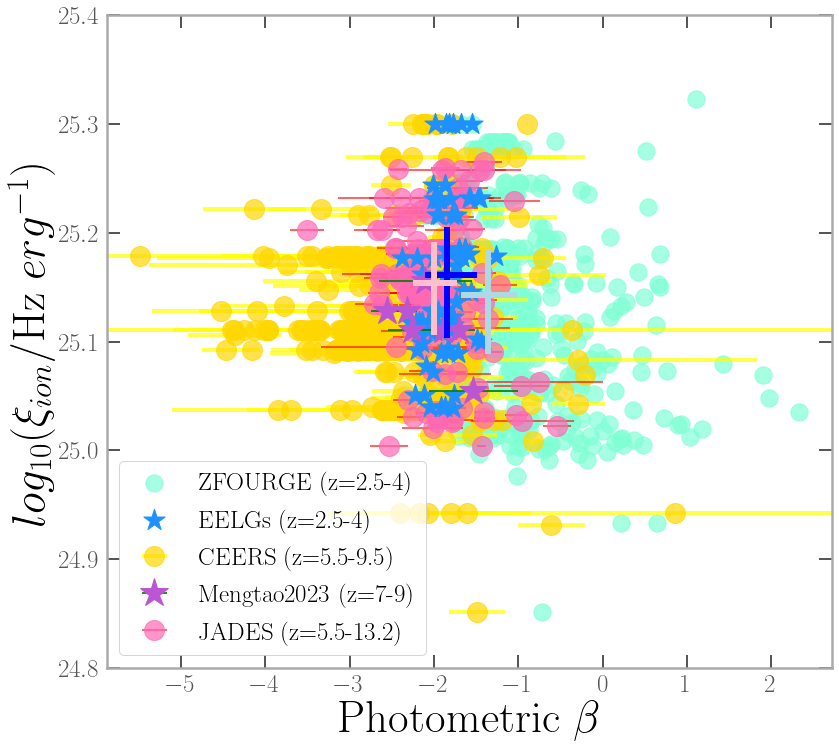

In [9]:
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'Photometric $\beta$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')

ax.errorbar(BC['betaP'],BC4IGM['sion'],xerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
               ecolor='yellow', alpha=0.7,zorder=2,c='gold',linewidth=4)
# ax.scatter(BC['betaP'],BC4IGM['sion'],label='CEERS',s=300, alpha=0.7,zorder=1,c='gold')
# plt.errorbar(median(JS['M(stars)']),median(JS[r'sSFR$_{0.1Gyr}$']),xerr=x_error3,yerr=y_error3,c='hotpink',ecolor='pink',linewidth=6,zorder=10)

ax.scatter(BFM['betaP'],BFMIGM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax.errorbar(median(BFM['betaP']),median(BFMIGM['sion']),xerr=x_error1,yerr=y_error1,ecolor='lightblue',linewidth=6,zorder=10)
ax.errorbar(BMT['betaP'],BMTIGM['sion'],xerr=BMT['betaP_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(BFMELG['betaP'],BFMIGMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
ax.errorbar(median(BFMELG['betaP']),median(BFMIGMELG['sion']),xerr=x_error,yerr=y_error,ecolor='blue',linewidth=6,zorder=10)
ax.errorbar(JSN['betaP'],JSN['sion'],xerr=JSN['betaP_er'],label='JADES (z=5.5-13.2)',markersize=20,fmt='o',
              ecolor='red',alpha=0.7,zorder=3,c='hotpink')
ax.errorbar(median(JSN['betaP']),median(JSN['sion']),xerr=x_error2,yerr=y_error2,ecolor='pink',linewidth=6,zorder=10)
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax.legend()
ax.set_ylim(24.8,25.4)
# ax.set_xlabel(r'Photometric $\beta$')
# ax.set_ylabel(r'$\psi_{ion}$')
fig.savefig('sionphotB.pdf', format='pdf', dpi=600, bbox_inches='tight')

/tmp/ipykernel_3661913/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


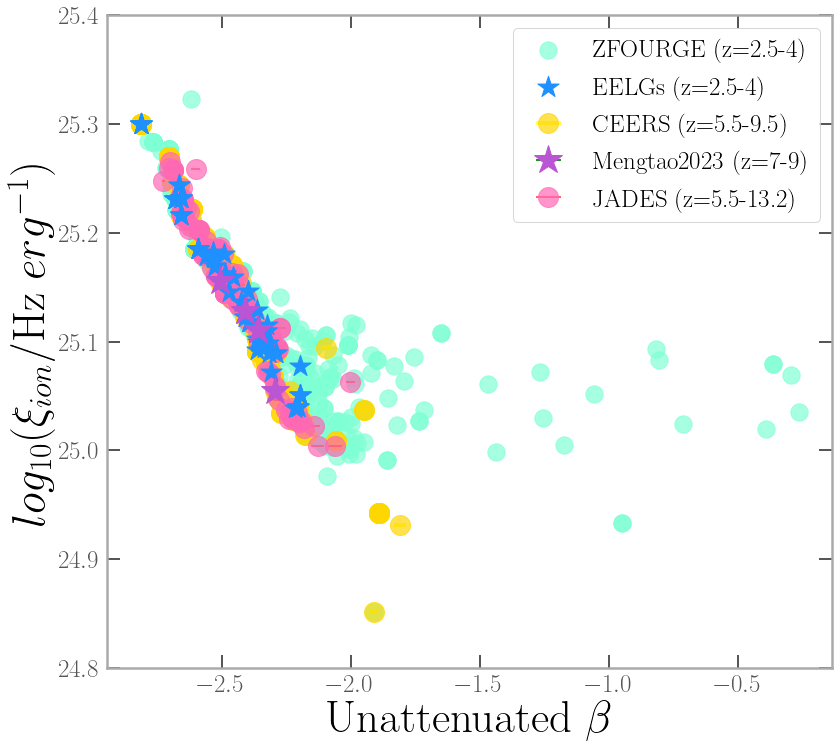

In [12]:
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'Unattenuated $\beta$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')

ax.errorbar(BC['betaU'],BC4IGM['sion'],xerr=BC['betaU_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
               ecolor='yellow', alpha=0.7,zorder=2,c='gold',linewidth=4)
# ax.scatter(BC['betaP'],BC4IGM['sion'],label='CEERS',s=300, alpha=0.7,zorder=1,c='gold')
# plt.errorbar(median(JS['M(stars)']),median(JS[r'sSFR$_{0.1Gyr}$']),xerr=x_error3,yerr=y_error3,c='hotpink',ecolor='pink',linewidth=6,zorder=10)

ax.scatter(BFM['betaU'],BFMIGM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
# ax.errorbar(median(BFM['betaU']),median(BFMIGM['sion']),xerr=x_error1,yerr=y_error1,ecolor='lightblue',linewidth=6,zorder=10)
ax.errorbar(BMT['betaU'],BMTIGM['sion'],xerr=BMT['betaU_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(BFMELG['betaU'],BFMIGMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
# ax.errorbar(median(BFMELG['betaU']),median(BFMIGMELG['sion']),xerr=x_error,yerr=y_error,ecolor='blue',linewidth=6,zorder=10)
ax.errorbar(JSN['betaU'],JSN['sion'],xerr=JSN['betaU_er'],label='JADES (z=5.5-13.2)',markersize=20,fmt='o',
              ecolor='red',alpha=0.7,zorder=3,c='hotpink')
# ax.errorbar(median(JSN['betaU']),median(JSN['sion']),xerr=x_error2,yerr=y_error2,ecolor='pink',linewidth=6,zorder=10)
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax.legend()
ax.set_ylim(24.8,25.4)
# ax.set_xlabel(r'Photometric $\beta$')
# ax.set_ylabel(r'$\psi_{ion}$')
fig.savefig('sionphotB.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
JSN

In [ ]:
JSN.iloc[0]

/tmp/ipykernel_3157876/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


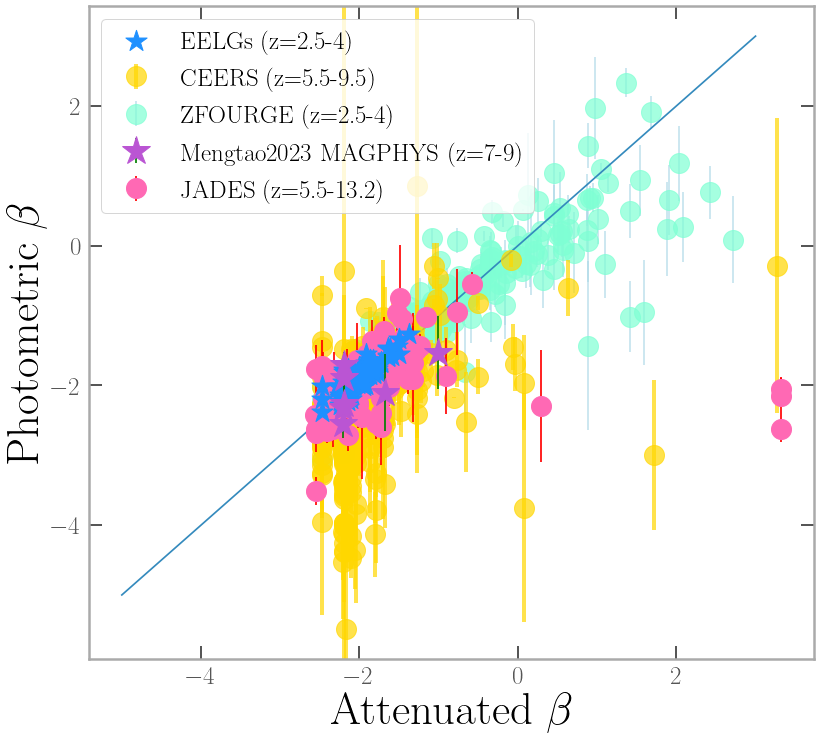

In [14]:
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'Attenuated $\beta$',r'Photometric $\beta$')

ax.errorbar(BC['beta'],BC['betaP'],yerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
               ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax.errorbar(BFM['beta'],BFM['betaP'],yerr=BFM['betaP_er'],label='ZFOURGE (z=2.5-4)',markersize=20, alpha=0.7,
            zorder=1,c='aquamarine',fmt='o',ecolor='lightblue')
ax.errorbar(BMT['beta'],BMT['betaP'],yerr=BMT['betaP_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(BFMELG['beta'],BFMELG['betaP'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
ax.errorbar(JSN['beta'],JSN['betaP'],yerr=JSN['betaP_er'],label='JADES (z=5.5-13.2)',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax.legend()
ax.plot(linspace(-5,3,10),linspace(-5,3,10))
# ax.set_ylim(24.8,25.4)
# ax.set_xlabel(r'Photometric $\beta$')
# ax.set_ylabel(r'$\psi_{ion}$')

In [ ]:
sum(abs(BC['betaP']/BC['betaP_er'])>10)/len(BC)

In [ ]:
BC[BC['betaP']==min(BC['betaP'])]

In [ ]:
BC

In [ ]:
plt.scatter(BC['betaP'].where(abs(BC['betaP']/BC['betaP_er'])>10),BC4IGM['sion'].where(abs(BC['betaP']/BC['betaP_er'])>10))

In [ ]:
sum(abs(BFM['betaP']/BFM['betaP_er'])>10)/len(BFM)

In [ ]:
print(mean(BFIGM['sion']) ,'Full',mean(BFMIGM['sion']) ,'krem',mean(BFIGMELG['sion']) ,'ELG',mean(BFMIGMELG['sion']), 'krem ELG')
print(std(BFIGM['sion']),'Full',std(BFMIGM['sion']),'krem',std(BFIGMELG['sion']),'ELG',std(BFMIGMELG['sion']),'krem ELG')
#ks test for sion kband removed vs not (for control and eelg)
print(kstest(BFIGM['sion'],BFMIGM['sion']), 'Full Sample')
print(kstest(BFIGMELG['sion'],BFMIGMELG['sion']), 'EELGs')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

# sc = plt.scatter(plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80),cmap=cm.Blues,s=105,alpha=0.8)

plt.scatter(S['LP'],Sem['LP'],c=S['SFRburst'])
plt.xlim(-200)
plt.ylim(-200)
plt.plot(linspace(-200,0,10),linspace(-200,0,10))

In [ ]:
# plt.figure(figsize=(16,10))
# mpl.rcParams.update({'font.size': 22})
# fig,ax =plt.subplots(1,1,figsize=(16,10))

# plt.scatter(Sem['StellarMass'],Sem2['StellarMass'],label='Stellar Mass')
# plt.scatter(Sem['SFRburst']*10**9,Sem2['SFRburst']*10**9,label='scaled SFRburst')
# plt.xlabel('Original')
# plt.ylabel('Expanded SFH params')
# plt.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(10**9,10**13)
# ax.set_xlim(10**9,10**13)

In [ ]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
# plt.scatter(SELG['StellarMass'],SELG['SFRburst']/SELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

# plt.scatter(Sem2['StellarMass'],Sem2['SFRburst']/Sem2['StellarMass']
#                ,marker='o', alpha=1, zorder=2,s=105, label='Expanded')
plt.scatter(Sem['StellarMass'],Sem['SFRburst']/Sem['StellarMass']
               ,marker='o', alpha=1, zorder=1,s=105, label='Original')
plt.scatter(SemELG['StellarMass'],SemELG['SFRburst']/SemELG['StellarMass']
               ,marker='o', alpha=1, zorder=3,s=105, label='Original')
plt.plot(linspace(10**9,10**12,10),linspace(10**-8,10**-8,10),c='red')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Expanded parameter limits ProSpect')

In [ ]:
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(Sem['StellarMass'],Sem['SFRburst'])
# plt.scatter(Sem2['StellarMass'],Sem2['SFRburst'])
ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(10**-4,10**4)

In [ ]:
# plt.figure(figsize=(16,10))
# # plt.scatter(Sem['z'], Sem['mSFR'], c='blue')
# # plt.plot(linspace(2.5,4,10),linspace(5,5,10),marker='_',c='blue')
# # plt.plot(linspace(2.5,4,10),linspace(-4,-4,10),marker='_',c='blue')
# # plt.scatter(Sem['z'], Sem['mpeak'],c='purple')
# # plt.plot(linspace(2.5,4,10),linspace(-2,-2,10),marker='_',c='purple')
# # plt.plot(linspace(2.5,4,10),linspace(3,3,10),marker='_',c='purple')
# plt.scatter(Sem2['z'], Sem2['mperiod'],c='red',label='mperiod')
# plt.plot(linspace(2.5,4,10),linspace(-1.5,-1.5,10),marker='_',c='red')
# plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='red')
# plt.scatter(Sem2['z'], Sem2['mskew'],c='green',label='mskew')
# plt.plot(linspace(2.5,4,10),linspace(-1,-1,10),marker='_',c='green')
# plt.plot(linspace(2.5,4,10),linspace(1.5,1.5,10),marker='_',c='green')
# plt.legend()
# plt.xlabel('redshift')
# plt.ylabel('SFH parameters')
# #Sem2 -4,-2,-1.5,-1.0 vs Sem -4, -2, -1,-0.5
# #Sem2 5, 3,  1,  1.5  vs Sem  5,  3,  1, 1

In [ ]:
# sum(Sem2['mperiod']==-1.5)/(sum(Sem2['mperiod']==-1.5)+sum(Sem['mperiod']==-1))
# sum(Sem2['mskew']==-1)/(sum(Sem2['mskew']==-1)+sum(Sem['mskew']==-0.5))

In [ ]:
plt.figure(figsize=(16,10))
# plt.scatter(Sem['z'], Sem['mSFR'], c='blue')
# plt.plot(linspace(2.5,4,10),linspace(5,5,10),marker='_',c='blue')
# # plt.plot(linspace(2.5,4,10),linspace(-4,-4,10),marker='_',c='blue')
# plt.scatter(Sem['z'], Sem['mpeak'],c='purple')
# plt.plot(linspace(2.5,4,10),linspace(-2,-2,10),marker='_',c='purple')
# plt.plot(linspace(2.5,4,10),linspace(3,3,10),marker='_',c='purple')
plt.scatter(Sem['z'], Sem['mperiod'],c='red',label='mperiod')
plt.plot(linspace(2.5,4,10),linspace(-1,-1,10),marker='_',c='red')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='red')
plt.scatter(Sem['z'], Sem['mskew'],c='green',label='mskew')
plt.plot(linspace(2.5,4,10),linspace(-0.5,-0.5,10),marker='_',c='green')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='green')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('SFH parameters')


In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(F[r'$\mu$'],F[r'$\tau_V$'],label='Full Sample',s=105)
plt.scatter(FELG[r'$\mu$'],FELG[r'$\tau_V$'],label='EELG',s=145,marker='*',c='purple')
plt.scatter(Fun[r'$\mu$'],Fun[r'$\tau_V$'],label='Unconstrained',s=105,alpha=0.5,c='yellow')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\tau_V$')
plt.legend()

In [ ]:
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SemELG['StellarMass'],SemELG['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(Sem['StellarMass'],Sem['SFRburst']
             ,xerr=(Sem['StellarMass']-Sem['StellarMass_LB'],Sem['StellarMass_UB']-Sem['StellarMass'])
             ,yerr=(Sem['SFRburst']-Sem['SFRburst_LB'],Sem['SFRburst_UB']-Sem['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect with Emission')

In [ ]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((SELG['StellarMass']),SELG['mSFR'])
plt.scatter(SELG['StellarMass'],SELG['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(S['StellarMass'],S['SFRburst']
             ,xerr=(S['StellarMass']-S['StellarMass_LB'],S['StellarMass_UB']-S['StellarMass'])
             ,yerr=(S['SFRburst']-S['SFRburst_LB'],S['SFRburst_UB']-S['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect')

In [ ]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SELG['StellarMass'],SELG['SFRburst']/SELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(S['StellarMass'],S['SFRburst']/S['StellarMass']
             ,xerr=(S['StellarMass']-S['StellarMass_LB'],
                    S['StellarMass_UB']-S['StellarMass'])
             ,yerr=((S['SFRburst']/S['StellarMass']-((S['SFRburst']/S['StellarMass'])*(S['SFRburst_LB']/S['SFRburst']-S['StellarMass_LB']/S['StellarMass']))),
                    (((S['SFRburst_UB']/S['SFRburst']+S['StellarMass_UB']/S['StellarMass'])*S['SFRburst']/S['StellarMass'])+S['SFRburst']/S['StellarMass'])),
             fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Specific Star Formation Rate ProSpect')

In [ ]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SemELG['StellarMass'],SemELG['SFRburst']/SemELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(Sem['StellarMass'],Sem['SFRburst']/Sem['StellarMass']
             ,xerr=(Sem['StellarMass']-Sem['StellarMass_LB'],
                    Sem['StellarMass_UB']-Sem['StellarMass'])
             ,yerr=(Sem['SFRburst']/Sem['StellarMass']-(Sem['SFRburst_LB']+Sem['StellarMass_LB']),
                    (Sem['SFRburst_UB']+Sem['StellarMass_UB'])-Sem['SFRburst']/Sem['StellarMass']),
             fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Specific Star Formation Rate ProSpect- emission removed')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(S['StellarMass'],Sem['StellarMass'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('Mass without emission')
plt.ylabel('Mass with emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect Stellar Mass')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FELG['M(stars)'],(FELG[r'$SFR_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =3, label='EELGs')

plt.errorbar(F['M(stars)'],(F[r'$SFR_{0.1Gyr}$'])
             ,xerr=(((F['M(stars)'])-(Fers['SMl']))
                    ,((Fers['SMh'])-(F['M(stars)'])))
             ,yerr=((F[r'$SFR_{0.1Gyr}$'])-(Fers['SFRl'])
                    ,(Fers['SFRh'])-(F[r'$SFR_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=2, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.scatter(T['M(stars)'],(T[r'$SFR_{0.1Gyr}$']),c='g', marker='*', s=105, zorder =1, label='SN<20',alpha=0.3)
plt.scatter(Fun['M(stars)'],Fun[r'$SFR_{0.1Gyr}$'],c='yellow',s=105,zorder=4,label='Unconstrained',alpha=0.6)
plt.ylabel('SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

plt.scatter(T['M(stars)'],(T[r'sSFR$_{0.1Gyr}$']),c='g', marker='*', s=105, zorder =4, label='SN<20')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')


In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FMELG['M(stars)'],(FMELG[r'$SFR_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FM['M(stars)'],(FM[r'$SFR_{0.1Gyr}$'])
             ,xerr=(((FM['M(stars)'])-(FMers['SMl']))
                    ,((FMers['SMh'])-(FM['M(stars)'])))
             ,yerr=((FM[r'$SFR_{0.1Gyr}$'])-(FMers['SFRl'])
                    ,(FMers['SFRh'])-(FM[r'$SFR_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS- Kband removed')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FELG['M(stars)'],(FELG[r'sSFR$_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(F['M(stars)'],(F[r'sSFR$_{0.1Gyr}$'])
             ,xerr=(((F['M(stars)'])-(Fers['SMl']))
                    ,((Fers['SMh'])-(F['M(stars)'])))
             ,yerr=((F[r'sSFR$_{0.1Gyr}$'])-(Fers['sSFRl'])
                    ,(Fers['sSFRh'])-(F[r'sSFR$_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')
plt.scatter(Fun['M(stars)'],Fun[r'sSFR$_{0.1Gyr}$'],c='yellow',s=105,zorder=3,label='Unconstrained',alpha=0.5)

plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Specific Star Formation Rate MAGPHYS')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FMELG['M(stars)'],(FMELG[r'sSFR$_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FM['M(stars)'],(FM[r'sSFR$_{0.1Gyr}$'])
             ,xerr=(((FM['M(stars)'])-(FMers['SMl']))
                    ,((FMers['SMh'])-(FM['M(stars)'])))
             ,yerr=((FM[r'sSFR$_{0.1Gyr}$'])-(FMers['sSFRl'])
                    ,(FMers['sSFRh'])-(FM[r'sSFR$_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Specific Star Formation Rate MAGPHYS- Kband removed')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=F['redshift'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=F[r'$age_M$'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=FM[r'$age_M$'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='age')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=log10(F[r'$SFR_{0.1Gyr}$']),cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=BFM['betaP'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label=r'Photometric $\beta$')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

In [ ]:
BFM

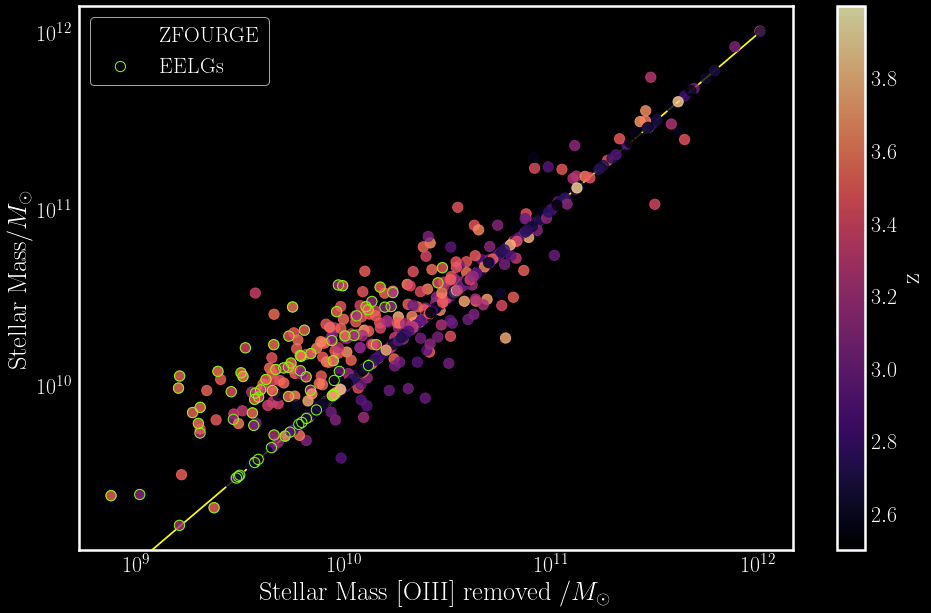

In [34]:
mpl.rcParams.update({'font.size': 22})
plt.style.use('dark_background')

fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])

# Q=F['redshift']>3
# Q=F[Q]
# QM=FM['redshift']>3
# QM=FM[QM]
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='yellow')
plt.xlabel(r'Stellar Mass [OIII] removed /$M_{\odot}$')
plt.ylabel(r'Stellar Mass/$M_{\odot}$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
# plt.title('Magphys Stellar Mass with and without contamination')
ax.grid(False)
sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=F['redshift'],cmap=cm.magma,s=105,alpha=0.8,label='ZFOURGE')
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],edgecolor='chartreuse',facecolor='none',marker='o',s=105,label='EELGs')
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')
plt.legend()
fig.savefig(path+'Contaminationplot.png', format='png', dpi=600, bbox_inches='tight')

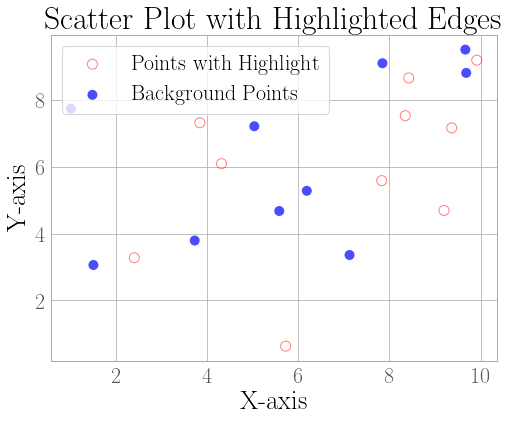

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for two scatter plots
x1 = np.random.rand(10) * 10
y1 = np.random.rand(10) * 10

x2 = np.random.rand(10) * 10
y2 = np.random.rand(10) * 10

# Create the plot
fig, ax = plt.subplots()

# Scatter plot with clear facecolor and red edgecolor
ax.scatter(x1, y1, marker='o', s=100, alpha=0.5, facecolor='none', edgecolor='red', label='Points with Highlight')

# Scatter plot with blue circles as background
ax.scatter(x2, y2, marker='o', s=100, alpha=0.7, facecolor='blue', edgecolor='none', label='Background Points')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Highlighted Edges')

# Add legend
ax.legend()

plt.show()

In [ ]:

mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,2,figsize=(16,10))

# plt.scatter(F[r'SFH $f_{mu}$'],F[r'IR $f_{mu}$'])
ax[0].scatter(F['M(dust)'],F['Ldust'],label='Magphys')#,c=F[r'IR $f_{mu}$'])
ax[0].scatter(S['dustmass.total'],S['dustlum.total'],label='ProSpect')
ax[0].scatter(Fun['M(dust)'],Fun['Ldust'],label='Unconstrained',c='yellow',alpha=0.5)

ax[1].scatter(FM['M(dust)'],FM['Ldust'],label='Magphys-Kremoved')
ax[1].scatter(Sem['dustmass.total'],Sem['dustlum.total'],label='ProSpect-emissionremov')




ax[0].set_ylabel('Dust Mass')#log star formation rate/ M_star/yr
ax[0].set_xlabel('Dust Lum')
ax[1].set_xlabel('Dust Lum')
ax[0].legend()
ax[1].legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.figure(figsize=(10,8))
sc = plt.scatter(log10(F['M(dust)']),log10(F['Ldust']),c=F[r'IR $f_{mu}$'],cmap=cm.magma,s=105,alpha=0.8,label='Magphys')
# plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='IR_$f_\mu$')
plt.xlabel('Dust Mass/$M_\odot$')
plt.ylabel('Dust Luminosity/$L_\odot$')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(S['StellarMass'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('ProSpect Mass without emission')
plt.ylabel('Magphys Mass without emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect/Magphys Stellar Mass')

In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter((F[r'$SFR_{0.1Gyr}$']),(S['SFRburst']))
plt.xlabel('Magphys SFR')
plt.ylabel('ProSpect SFR')
plt.plot(linspace(1,3500,10),linspace(1,3500,10))

ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1,3000)

In [ ]:
SAM_z = FM['redshift']
Pro_z = FMELG['redshift']
SAM_SM = log10(FM['M(stars)'])
Pro_SM = log10(FMELG['M(stars)'])
SAM_SFR = log10(FM[r'$SFR_{0.1Gyr}$'])
Pro_SFR = log10(FMELG[r'$SFR_{0.1Gyr}$'])
SAM_sSFR = log10(FM[r'sSFR$_{0.1Gyr}$'])
Pro_sSFR = log10(FMELG[r'sSFR$_{0.1Gyr}$'])
SAM_dlum = FM['Ldust']
Pro_dlum = FMELG['Ldust']
SAM_dmas = FM['M(dust)']
Pro_dmas = FMELG['M(dust)']

In [ ]:
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(Sem['StellarMass'],Sem['Zfinal'],c='red')
# plt.scatter(Sem2['StellarMass'],Sem2['Zfinal'],c='green')
ax.set_xscale('log')

In [ ]:
#PROSPECT- with emission lines #changed to MAGPHYS
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_z),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_z, bins=bin_lims)
hist2, _ = np.histogram(Pro_z, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SM)),max(log10(SAM_SM)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SM), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SM), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFR),max(SAM_SFR),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFR, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
# bin_limssSFR = np.linspace(min(log10(10**SAM_SFR/(SAM_SM))),max(log10(10**SAM_SFR/(SAM_SM))),num_binsSFR+1)
bin_limssSFR = np.linspace(min(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))),max(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))),num_binsSFR+1)

bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
# hist1sSFR, _ = np.histogram(log10(10**SAM_SFR/(SAM_SM)), bins=bin_limssSFR)
# hist2sSFR, _ = np.histogram(log10(10**Pro_SFR/(Pro_SM)), bins=bin_limssSFR)

hist1sSFR, _ = np.histogram(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(Pro_sSFR, bins=bin_limssSFR)


##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])))),max(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])))),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlum), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmas)),max(log10(SAM_dmas)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmas), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmas), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8, label='ZFOURGE (z=2.5-4)')
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6, label='EELGs (z=2.5-4)')
ax1.grid(False)
ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)
ax2.grid(False)
ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
ax1.legend()
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()